## Conduit 20 Geosmin Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mb

### Step 1: Import necessary dataframes for geosmin concentrations at Marston Reservoir - conduit20_geosmin

In [2]:
#conduit 20 geosmin entries - this is the file that we will be using for this notebook
conduit20_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/conduit20_geosmin.csv')

#reservoir sampling geosmin entries
sample_res_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/sample_res_geosmin.csv')
#water treatment plant samples
wtp_samples_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/wtp_samples_geosmin.csv')
#water treatment plant influent geosmin entries
wtp_influent_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/wtp_influent_geosmin.csv')

### Step 2: Import the necessary dataframes for nutrient information - df_full.
##### Note that the nutrient information will be used later on in the analysis for geosmin records after October 3, 2019.

In [3]:
ms_above_conf_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/nut_ms_above_conf_filled.csv')
nf_above_conf_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/nut_nf_above_conf_filled.csv')
downstream_strontia_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/nut_downstream_strontia_filled.csv')
upstream_strontia_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/nut_upstream_strontia_filled.csv')
sp_below_chat_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/nut_sp_below_chat_filled.csv')

In [4]:
#reset indices to ease merging of dataframes
ms_above_conf_nut.reset_index(drop=True, inplace=True)
nf_above_conf_nut.reset_index(drop = True, inplace= True)
downstream_strontia_nut.reset_index(drop=True, inplace=True)
upstream_strontia_nut.reset_index(drop=True, inplace=True)
sp_below_chat_nut.reset_index(drop=True, inplace=True)

#concat is not working, use merge function as well
df_full = ms_above_conf_nut.merge(nf_above_conf_nut, on=['Date'], how='outer')
df_full = df_full.merge(downstream_strontia_nut, on=['Date'], how='outer')
df_full = df_full.merge(upstream_strontia_nut, on=['Date'], how='outer')
df_full = df_full.merge(sp_below_chat_nut, on=['Date'], how = 'outer')
df_full

,Date,TOC,TP,Turbidity,"Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia","Adjusted TOC, Upstream Strontia","Adjusted TP, Upstream Strontia","Adjusted turbidity, Upstream Strontia","Adjusted TOC, SP Below Chatfield","Adjusted TP, SP Below Chatfield","Adjusted turbidity, SP Below Chatfield"
0,10/3/2019,3.900000,0.015000,0.880000,2.200000,0.000000,1.800000,2.800000,0.000000,2.500000,2.700000,0.012000,1.300000,3.800000,0.019000,7.400000
1,10/4/2019,3.856277,0.014043,0.858138,2.199746,0.000000,1.806381,2.750444,0.000925,2.475848,2.668095,0.011545,1.300000,3.851048,0.019004,7.049616
2,10/5/2019,3.813845,0.013127,0.836923,2.198991,0.000000,1.812485,2.702975,0.001809,2.451921,2.637577,0.011097,1.300000,3.899877,0.019015,6.712454
3,10/6/2019,3.772691,0.012252,0.816346,2.197742,0.000000,1.818317,2.657550,0.002654,2.428217,2.608415,0.010654,1.300000,3.946536,0.019034,6.388265
4,10/7/2019,3.732799,0.011417,0.796399,2.196010,0.000000,1.823884,2.614123,0.003461,2.404735,2.580579,0.010218,1.300000,3.991074,0.019060,6.076802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,6/27/2022,3.672687,0.017566,1.262980,1.386207,0.023010,4.194845,2.569160,0.017053,2.331630,3.020314,0.009394,5.715335,4.043297,0.069535,8.422129
999,6/28/2022,3.679496,0.017549,1.254653,1.389655,0.023254,4.383081,2.525783,0.017285,2.284832,3.040042,0.009162,5.773119,4.044972,0.074167,8.679552
1000,6/29/2022,3.686318,0.017533,1.246381,1.393103,0.023500,4.579763,2.483140,0.017520,2.238974,3.059898,0.008936,5.831487,4.046647,0.079108,8.944844
1001,6/30/2022,3.693153,0.017516,1.238163,1.396552,0.023749,4.785270,2.441216,0.017758,2.194036,3.079884,0.008715,5.890446,4.048323,0.084379,9.218244


In [5]:
#renaming some columns for clarity
df_full = df_full.rename(columns = {'TOC':'Adjusted TOC, MS above Conf.','TP':'Adjusted TP, MS above Conf.','Turbidity':'Adjusted turbidity, MS above Conf.'})

In [6]:
#this dataset will be used manually later on, so it was converted to a csv/Excel file
df_full.to_csv('df_full.csv',index = True)
df_full.to_excel('df_full.xlsx',index = False)

### Step 3: Import the flow rate calculations and the water temperature calculations. Reset indices and restructure column titles. 
##### Don't merge with above conduit20_geosmin data - will do so by making a copy of the below dataframe to be used for later. 

In [7]:
#waterton gage data - flow rate and water temperature calculations
waterton_data = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/waterton_data.csv')

#cheesman and roberts tunnel data and strontia temp data
ch_rt_data = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/cheesman_roberts_flow_temp_data.csv')

#conduit 20 and marston reservoir data (with flow, air temperature)
cond20_mar_data = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/marston_cond20_flow_temp_data.csv')


#water temp data from different points

#nf above confluence
nf_above_conf_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/nf_above_conf_temp_filled.csv')
#ms above confluence
ms_above_conf_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/ms_above_conf_temp_filled.csv')
#upstream strontia
upstream_strontia_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/upstream_strontia_temp_filled.csv')
#downstream strontia
downstream_strontia_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/downstream_strontia_temp_filled.csv')
#sp below chatfield
sp_below_chat_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/sp_below_chat_temp_filled.csv')

#reset indices for the water temperature dataframes
ms_above_conf_temp.reset_index(drop=True, inplace=True)
nf_above_conf_temp.reset_index(drop=True, inplace=True)
upstream_strontia_temp.reset_index(drop=True, inplace=True)
downstream_strontia_temp.reset_index(drop=True, inplace=True)
sp_below_chat_temp.reset_index(drop=True, inplace=True)

#cleaning up names
nf_above_conf_temp = nf_above_conf_temp.rename(columns = {'Water Temp':'Water Temperature, NF above Confluence'})
ms_above_conf_temp = ms_above_conf_temp.rename(columns = {'Water Temp':'Water Temperature, MS above Confluence'})
upstream_strontia_temp = upstream_strontia_temp.rename(columns = {'Water Temp':'Water Temperature, Upstream Strontia'})
downstream_strontia_temp = downstream_strontia_temp.rename(columns = {'Water Temp':'Water Temperature, Downstream Strontia'})
sp_below_chat_temp = sp_below_chat_temp.rename(columns = {'Water Temp':'Water Temperature, SP Below Chatfield'})

#merging water temperature dataframes
df_water_temp = ms_above_conf_temp.merge(nf_above_conf_temp, on=['Date'], how='outer')
df_water_temp = df_water_temp.merge(upstream_strontia_temp, on = ['Date'], how = 'outer')
df_water_temp = df_water_temp.merge(downstream_strontia_temp, on = ['Date'], how = 'outer')
df_water_temp = df_water_temp.merge(sp_below_chat_temp, on = ['Date'], how = 'outer')

#final dataframe for water temperatures
df_water_temp

,Date,"Water Temperature, MS above Confluence","Water Temperature, NF above Confluence","Water Temperature, Upstream Strontia","Water Temperature, Downstream Strontia","Water Temperature, SP Below Chatfield"
0,6/1/2012,14.554844,8.586489,9.083256,15.358337,17.075902
1,6/2/2012,14.333172,8.872917,9.453704,15.236844,17.543801
2,6/3/2012,14.121086,9.148626,9.813862,15.117757,17.999793
3,6/4/2012,13.918585,9.413614,10.163730,15.001076,18.443879
4,6/5/2012,13.725671,9.667884,10.503308,14.886802,18.876058
...,...,...,...,...,...,...
3677,6/26/2022,14.239519,12.581977,12.237893,14.646480,21.242407
3678,6/27/2022,14.191289,12.565539,12.189940,14.716511,21.293677
3679,6/28/2022,14.143223,12.549122,12.142175,14.786877,21.345071
3680,6/29/2022,14.095320,12.532727,12.094597,14.857580,21.396590


### Step 4: Import datafiles for flow and air temperatures and merge with the df_final_wo_nut dataframe (this is the dataframe without nutrient concentration data)

In [8]:
#merge different datasets + initial cleaning
df_flows_temp = waterton_data.merge(ch_rt_data, on=['Date '], how='outer')
df_flows_temp = df_flows_temp.merge(cond20_mar_data, on = ['Date '], how = 'outer')
 
df_flows_temp = df_flows_temp.dropna(subset = ['South Platte Below Cheesman Downstream (cfs) '])
df_flows_temp = df_flows_temp.rename(columns = {'Date ':'Date'})
df_final_wo_nut = df_water_temp.merge(df_flows_temp, on = ['Date'], how = 'outer')

In [9]:
#done to account of mis-inputs of flows (errors on the part of mistypes by reservoir caretakers/computer glitches) 

df_final_wo_nut['Conduit 20 (with Chatfield flow) (cfs)'] = df_final_wo_nut['Conduit 20 (with Chatfield flow) (cfs)'] + 0.09
df_final_wo_nut['Marston WTP Outflow (cfs)'] = df_final_wo_nut['Marston WTP Outflow (cfs)'] + 4.51
df_final_wo_nut['Conduit 20 to Marston Total (No Chatfield water) '] = df_final_wo_nut['Conduit 20 to Marston Total (No Chatfield water) '] + 0.09
df_final_wo_nut['Roberts Tunnel Flowrate (cfs)'] = df_final_wo_nut['Roberts Tunnel Flowrate (cfs)'] + 2

In [10]:
df_final_wo_nut

,Date,"Water Temperature, MS above Confluence","Water Temperature, NF above Confluence","Water Temperature, Upstream Strontia","Water Temperature, Downstream Strontia","Water Temperature, SP Below Chatfield",Waterton Gage (cfs),"Temp Ch, C (high)","Chatfield, Low Temp (C)","Waterton Gage, High Water Temp (C)",...,"Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)"
0,6/1/2012,14.554844,8.586489,9.083256,15.358337,17.075902,47.4,27.8,10.0,19.65216,...,19.455956,263.250000,26.111111,7.222222,43.89,63.89,81.86,97.00,22.777778,8.333333
1,6/2/2012,14.333172,8.872917,9.453704,15.236844,17.543801,47.9,27.8,12.8,19.65216,...,20.626178,263.250000,26.666667,7.222222,43.89,63.89,81.86,97.00,27.222222,11.111111
2,6/3/2012,14.121086,9.148626,9.813862,15.117757,17.999793,47.4,31.1,12.2,21.61797,...,20.918733,263.250000,28.888889,11.666667,45.69,65.69,81.86,96.05,23.888889,10.555556
3,6/4/2012,13.918585,9.413614,10.163730,15.001076,18.443879,45.4,32.2,17.2,22.27324,...,20.918733,247.100000,28.888889,11.666667,43.03,63.03,81.86,95.91,31.111111,13.888889
4,6/5/2012,13.725671,9.667884,10.503308,14.886802,18.876058,45.3,28.3,16.7,19.95001,...,18.870844,218.679167,27.777778,13.888889,43.74,63.74,81.86,96.18,31.666667,15.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,6/26/2022,14.239519,12.581977,12.237893,14.646480,21.242407,179.0,19.4,11.1,14.64828,...,16.530400,329.666700,28.333333,11.666667,112.67,112.67,71.71,295.00,18.333333,12.222222
3678,6/27/2022,14.191289,12.565539,12.189940,14.716511,21.293677,157.0,30.6,12.2,21.32012,...,10.679289,382.708300,31.666667,13.333333,86.75,86.75,66.38,244.00,18.333333,11.111111
3679,6/28/2022,14.143223,12.549122,12.142175,14.786877,21.345071,151.0,33.9,11.1,23.28593,...,21.796400,390.750000,31.111111,13.333333,81.74,81.74,78.33,235.00,28.888889,12.222222
3680,6/29/2022,14.095320,12.532727,12.094597,14.857580,21.396590,152.0,32.8,16.1,22.63066,...,20.918733,390.875000,24.444444,9.444444,81.73,81.73,73.46,234.00,32.777778,16.666667


In [11]:
df_final_wo_nut.to_excel('df_final_wo_nut.xlsx',index = True)

### Step 5: Transforming the various predictor variables to ensure a linear relationship before Pearson coefficients and multivariate linear regression models are calculated

/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


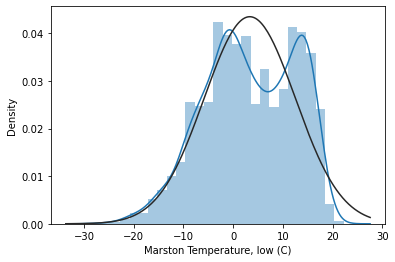

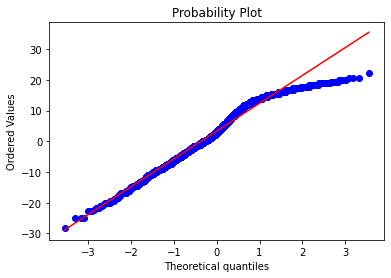

In [12]:
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

#constant for log transformation
a = 5

#sample distribution from one of the predictor variabless to show how transformations fit a Gaussian distribution
sns.distplot(df_final_wo_nut['Marston Temperature, low (C)'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_final_wo_nut['Marston Temperature, low (C)'], plot=plt)

In [13]:
df_final_wo_nut['Waterton Gage (cfs)'] = 1 / (df_final_wo_nut['Waterton Gage (cfs)']) ** (1/3)
df_final_wo_nut['South Platte Above Cheesman Flowrate (cfs)'] = np.log(df_final_wo_nut['South Platte Above Cheesman Flowrate (cfs)'])
df_final_wo_nut['South Platte Below Cheesman Downstream (cfs) '] = np.log(df_final_wo_nut['South Platte Below Cheesman Downstream (cfs) '])
#no transformation on Roberts Tunnel flowrate
df_final_wo_nut['Conduit 20 (with Chatfield flow) (cfs)'] = np.sqrt(df_final_wo_nut['Conduit 20 (with Chatfield flow) (cfs)'])
df_final_wo_nut['Conduit 20 to Marston Total (No Chatfield water) '] = np.sqrt(df_final_wo_nut['Conduit 20 to Marston Total (No Chatfield water) '])
df_final_wo_nut['Marston WTP Outflow (cfs)'] = np.sqrt(df_final_wo_nut['Marston WTP Outflow (cfs)'])
df_final_wo_nut['Strontia Springs Outflow (cfs)'] = np.log(df_final_wo_nut['Strontia Springs Outflow (cfs)'])
#no transformation needed on Marston H or L temperature

/opt/anaconda3/envs/gds/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/gds/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
# saving df_final_wo_nut with appropriate transformations 
df_final_wo_nut.to_csv('df_final_wo_nut.csv', index = True)

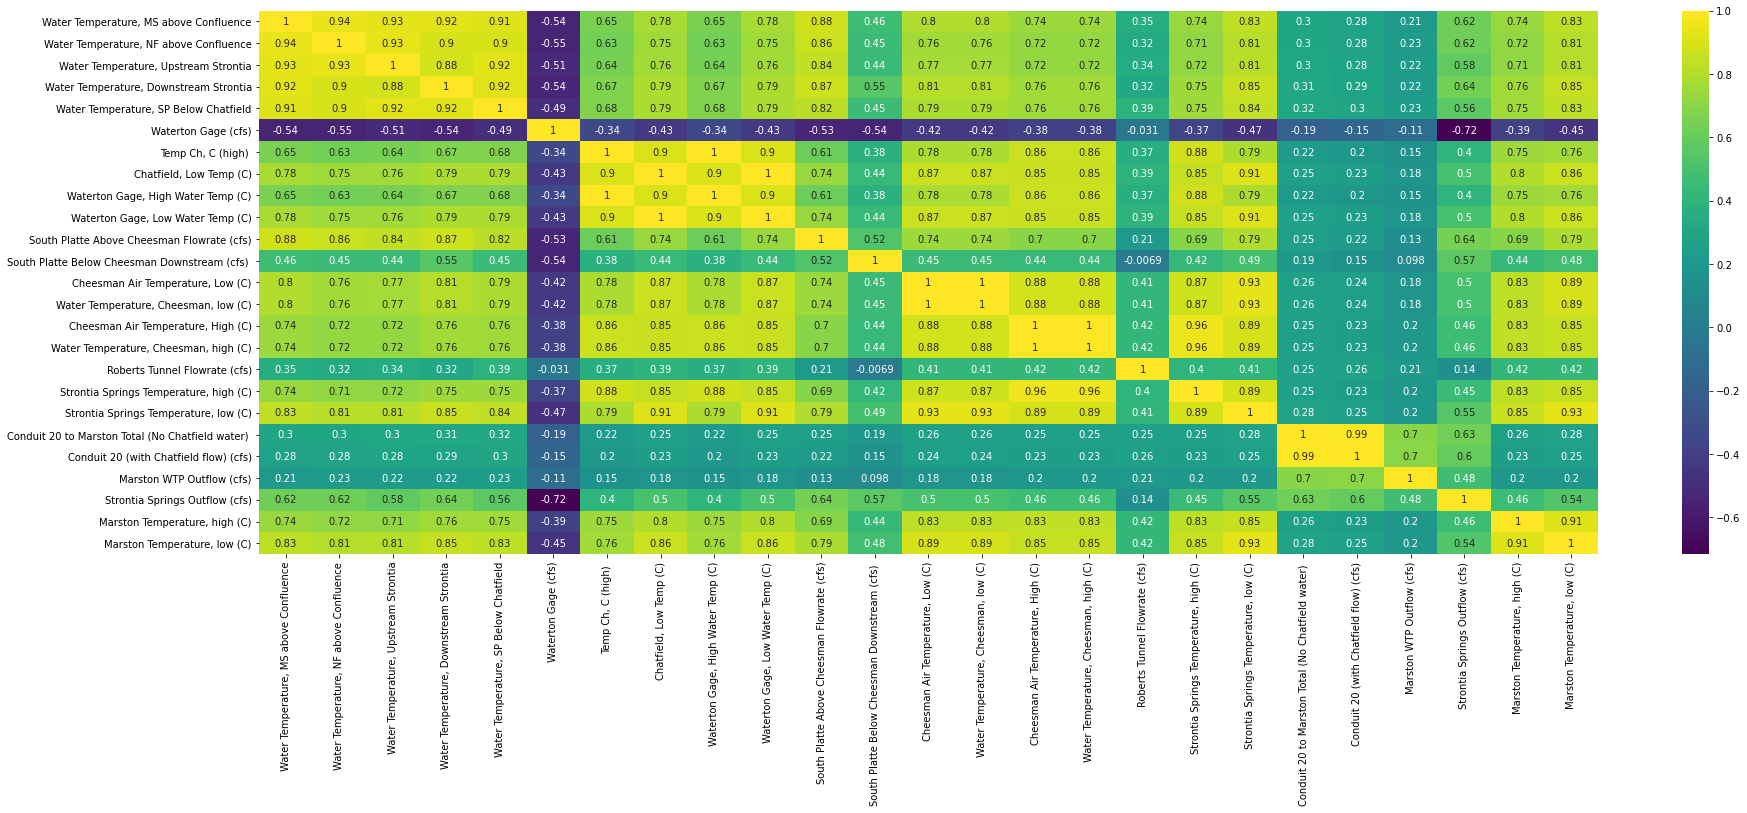

In [14]:
#df_final_wo_nut = df_final_wo_nut.set_index(['Date'])

corrl = df_final_wo_nut.corr()

import matplotlib.pyplot as plt

plt.figure(figsize = (30,10))
ax = sb.heatmap(corrl,cmap='viridis',annot = True)

##### The correlation coefficients above are calculated in the form of Pearson linear coefficients. Because of the geographical proximity for most of the reservoirs, it was expected they they have higher correlation coefficients in the air temperature categories. Also, as expected, the water temperature calcuations would not be feasible, as they were calculated using air temperatures because of a lack of adequate monitoring. For flow data, it may vary based on what the demand was from each reservoir. Therefore, the threshold for manually eliminating categories for further analysis would be higher than the traditional Pearson coefficient threshold of ~ 0.7. 

In [15]:
#drop columns from above based on correlation matrix 
df_final_wo_nut = df_final_wo_nut.drop(columns = ['Water Temperature, MS above Confluence','Water Temperature, NF above Confluence','Water Temperature, Upstream Strontia','Water Temperature, Downstream Strontia','Water Temperature, SP Below Chatfield','Chatfield, Low Temp (C)','Waterton Gage, High Water Temp (C)','Waterton Gage, Low Water Temp (C)','Cheesman Air Temperature, Low (C)','Water Temperature, Cheesman, low (C)','Cheesman Air Temperature, High (C)','Water Temperature, Cheesman, high (C)','Strontia Springs Temperature, low (C)','Marston Temperature, low (C)'])

### Step 6: Fix the conduit20_geosmin dataframe for further analysis. 

##### Due to the availability of the nutrient data, which is only from 10/3/2019, a split multivariate linear regression will be made. The first MLR will be using only flow and temperature data using the full dataset, on which OLS will be run. The second MLR will be with a subset of the data from 10/3/2019 to 6/30/2022. This will be analyzed with the predictor variables of associated dates in that subset of flow and temperature data, now with the nutrient data. This will then be run using OLS to see whether an improvement is presented with the introduction of nutrient concentration. 

In [16]:
#reset conduit20_geosmin dataframe index
conduit20_geosmin.reset_index(drop=True, inplace=True)

#cleaning of conduit20_geosmin dataframe

#conduit20_geosmin.csv does not contain differences in DEPTH, so it can also be dropped
conduit20_geosmin = conduit20_geosmin.drop(columns = ['SAMPLE_NUMBER','SAMPLING_POINT_DESCRIPTION','SITE','ANALYTE','Time','FACILITY','SAMPLED_DATE','DEPTH'])

conduit20_geosmin = conduit20_geosmin.set_index(['Date'])


In [27]:
conduit20_geosmin

,SAMPLE_NAME,FORMATTED_ENTRY,UNITS,Target
Date,,,,
2/4/2013,WS-LP-021,2.14,ng/L,FRBY
4/22/2019,WS-LP-021,3.00,ng/L,FRBY
4/30/2019,WS-LP-021,4.00,ng/L,FRBY
5/7/2019,WS-LP-021,5.00,ng/L,FRBY
5/21/2019,WS-LP-021,4.00,ng/L,FRBY
...,...,...,...,...
5/31/2022,WS-LP-021,6.00,ng/L,FRBY
6/2/2022,WS-LP-021,5.00,ng/L,FRBY
6/7/2022,WS-LP-021,4.00,ng/L,FRBY


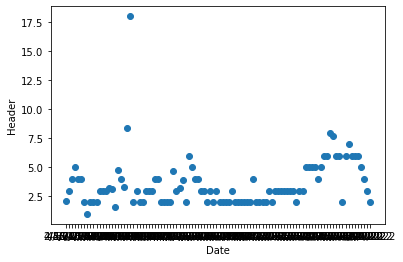

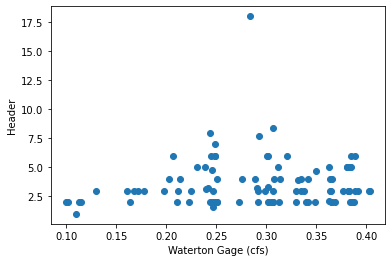

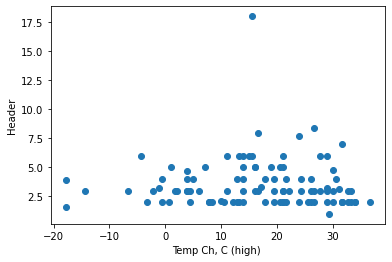

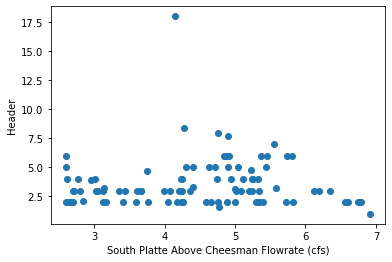

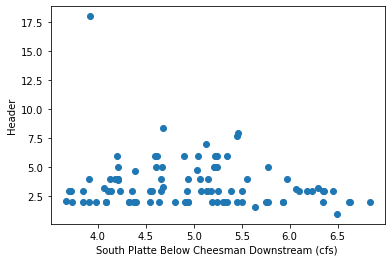

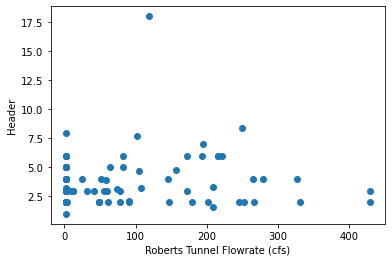

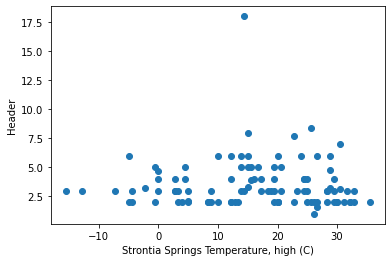

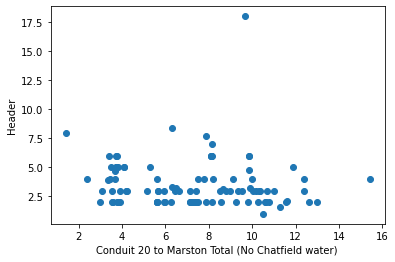

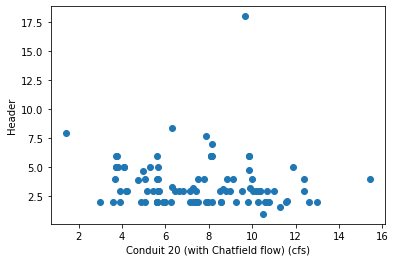

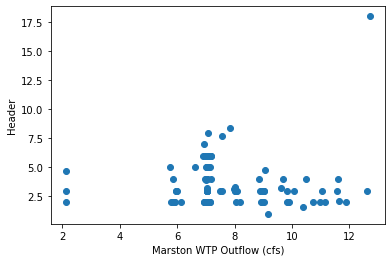

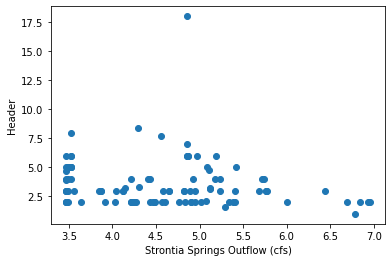

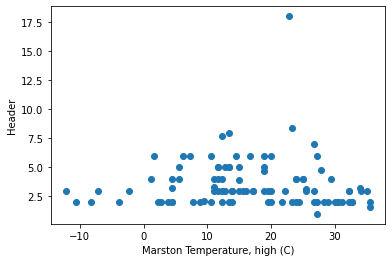

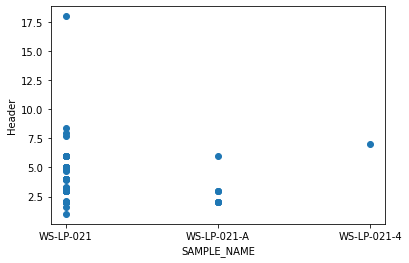

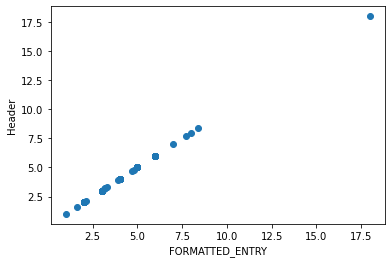

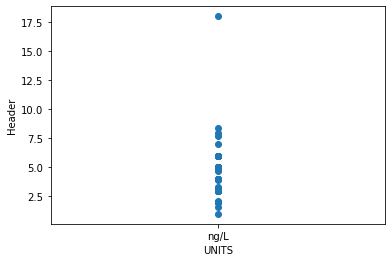

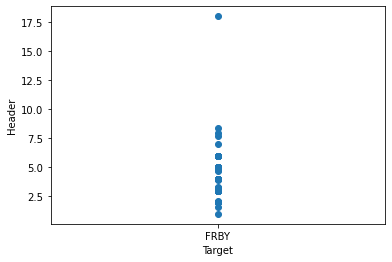

In [18]:
#merging the no-concentration dataframe with conduit 20 geosmin readings to get data only for days with geosmin recordings
result_conduit20 = pd.merge(df_final_wo_nut, conduit20_geosmin, on= "Date")

x_names = result_conduit20.columns.values.tolist()

from scipy import stats
from statsmodels.compat import lzip
import statsmodels
import seaborn as sns

for i, col in enumerate(result_conduit20.columns):
    # create scatterplot
    plt.figure()
    plt.scatter(x=result_conduit20[col], y=result_conduit20['FORMATTED_ENTRY'],)
    plt.xlabel(col)
    plt.ylabel('Header')

In [20]:
result_conduit20

,Date,Waterton Gage (cfs),"Temp Ch, C (high)",South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)",SAMPLE_NAME,FORMATTED_ENTRY,UNITS,Target
0,2/4/2013,0.363037,10.0,2.847141,3.666122,90.3500,5.000000,11.611201,11.611201,11.655042,5.070978,9.444444,WS-LP-021,2.14,ng/L,FRBY
1,4/22/2019,0.299026,6.1,5.017280,5.075174,2.0000,5.000000,12.374571,12.374571,12.617845,5.231109,19.444444,WS-LP-021,3.00,ng/L,FRBY
2,4/30/2019,0.288604,3.9,5.111988,4.941642,2.0000,2.777778,12.376187,12.376187,11.611632,5.231109,4.444444,WS-LP-021,4.00,ng/L,FRBY
3,5/7/2019,0.238837,13.9,4.905275,5.771441,2.0000,13.888889,5.309426,5.309426,5.739338,5.081404,18.888889,WS-LP-021,5.00,ng/L,FRBY
4,5/21/2019,0.213331,5.0,5.247024,5.968708,2.0000,4.444444,9.110434,9.110434,5.848932,5.713733,5.555556,WS-LP-021,4.00,ng/L,FRBY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5/31/2022,0.206843,15.6,5.455321,4.596129,82.5250,15.000000,8.088881,8.088881,7.118286,5.187386,18.888889,WS-LP-021,6.00,ng/L,FRBY
96,6/2/2022,0.231120,21.1,5.433722,4.605170,82.7417,20.555556,11.870131,11.870131,7.147727,5.416100,13.333333,WS-LP-021,5.00,ng/L,FRBY
97,6/7/2022,0.202740,26.1,5.257495,4.183576,146.1875,25.000000,7.511325,7.511325,7.172168,5.176150,25.000000,WS-LP-021,4.00,ng/L,FRBY
98,6/14/2022,0.197402,28.9,5.087596,4.135167,172.3333,29.444444,9.516302,9.516302,8.021845,5.402677,35.000000,WS-LP-021,3.00,ng/L,FRBY


In [21]:
#development of first MLR model without nutrient concentration

from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

#transformation of "FORMATTED ENTRY" = geosmin recordings
result_conduit20['FORMATTED_ENTRY'] = np.log(result_conduit20['FORMATTED_ENTRY'])

x_vals_wo_nut = result_conduit20[[
'Waterton Gage (cfs)',
 'Temp Ch, C (high) ',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Strontia Springs Temperature, high (C)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)'
 ]]

#standardize the values to help with predictor variable importance detection
x_vals_wo_nut = StandardScaler().fit_transform(x_vals_wo_nut)
y_vals_wo_nut = result_conduit20[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_wo_nut, y_vals_wo_nut)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x_vals_wo_nut) # adding a constant
 
model = sm.OLS(y_vals_wo_nut, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [1.15347791]
Coefficients: 
 [[-0.09793604  0.02710889  0.26197173 -0.05663095  0.0318988   0.00343572
   0.18539014 -0.11876644  0.06207785 -0.4312827  -0.05824626]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     2.121
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0266
Time:                        10:22:46   Log-Likelihood:                -52.921
No. Observations:                 100   AIC:                             129.8
Df Residuals:                      88   BIC:                             161.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std e

### Step 7: Now looking at changes with the incorporation of the nutrient concentration data. We first need to compile them together and check for multicollinearity, so we should look at a correlation heatmap at first.

##### First, we transform the nutrient data. Second, we then merge it with the previous df_final_wo_nut (make a copy to separate out variables). Then we basically combine it with another conduit20_geosmin copy to bring forth relevant dates, at which point we then run another multivariate linear regression. 

In [22]:
#displacing nutrient concentrations to mathematically allow for transformations
df_full['Adjusted TP, MS above Conf.'] = df_full['Adjusted TP, MS above Conf.'] + 1
df_full['Adjusted turbidity, MS above Conf.'] = df_full['Adjusted turbidity, MS above Conf.'] + 1
df_full['Adjusted TP, NF Above Conf.'] = df_full['Adjusted TP, NF Above Conf.'] + 1
df_full['Adjusted turbidity, NF Above Conf.'] = df_full['Adjusted turbidity, NF Above Conf.'] + 1.5
df_full['Adjusted TP, Downstream Strontia'] = df_full['Adjusted TP, Downstream Strontia'] + 1
df_full['Adjusted turbidity, Downstream Strontia'] = df_full['Adjusted turbidity, Downstream Strontia'] + 1.437
df_full['Adjusted TP, Upstream Strontia'] = df_full['Adjusted TP, Upstream Strontia'] + 1
df_full['Adjusted turbidity, Upstream Strontia'] = df_full['Adjusted turbidity, Upstream Strontia'] + 1
df_full['Adjusted TP, SP Below Chatfield'] = df_full['Adjusted TP, SP Below Chatfield'] + 1
df_full['Adjusted turbidity, SP Below Chatfield'] = df_full['Adjusted turbidity, SP Below Chatfield'] + 2.5

#transformations
df_full['Adjusted TOC, MS above Conf.'] = np.log(df_full['Adjusted TOC, MS above Conf.'])
df_full['Adjusted TP, MS above Conf.'] = np.log(df_full['Adjusted TP, MS above Conf.'])
df_full['Adjusted turbidity, MS above Conf.'] = np.sqrt(df_full['Adjusted turbidity, MS above Conf.'])

df_full['Adjusted TOC, NF Above Conf.'] = np.log(df_full['Adjusted TOC, NF Above Conf.'])
df_full['Adjusted TP, NF Above Conf.'] = np.log(df_full['Adjusted TP, NF Above Conf.'])
df_full['Adjusted turbidity, NF Above Conf.'] = np.log(df_full['Adjusted turbidity, NF Above Conf.'])

df_full['Adjusted TOC, Downstream Strontia'] = np.log(df_full['Adjusted TOC, Downstream Strontia'])
df_full['Adjusted TP, Downstream Strontia'] = np.sqrt(df_full['Adjusted TP, Downstream Strontia'])
df_full['Adjusted turbidity, Downstream Strontia'] = np.log(df_full['Adjusted turbidity, Downstream Strontia'])

df_full['Adjusted TOC, Upstream Strontia'] = np.sqrt(df_full['Adjusted TOC, Upstream Strontia'])
df_full['Adjusted TP, Upstream Strontia'] = np.log(df_full['Adjusted TP, Upstream Strontia'])
df_full['Adjusted turbidity, Upstream Strontia'] = np.sqrt(df_full['Adjusted turbidity, Upstream Strontia'])

df_full['Adjusted TOC, SP Below Chatfield'] = np.sqrt(df_full['Adjusted TOC, SP Below Chatfield'])
# dropping Adjusted TP below chatfield - transformation not really possible 
df_full['Adjusted turbidity, SP Below Chatfield'] = np.log(df_full['Adjusted turbidity, SP Below Chatfield'])

In [23]:
#make a copy of df_final_wo_nut, now with nutrient concentration

df_final_w_nut = df_final_wo_nut.copy()

#merging df_final_w_nut with df_full (the nutrient concentration dataframe)
df_full_val_w_nut = pd.merge(df_final_w_nut, df_full, on= "Date")
#now merge to fit with recorded geosmin values
result_w_nut_conduit20 = pd.merge(df_full_val_w_nut, conduit20_geosmin, on= "Date")

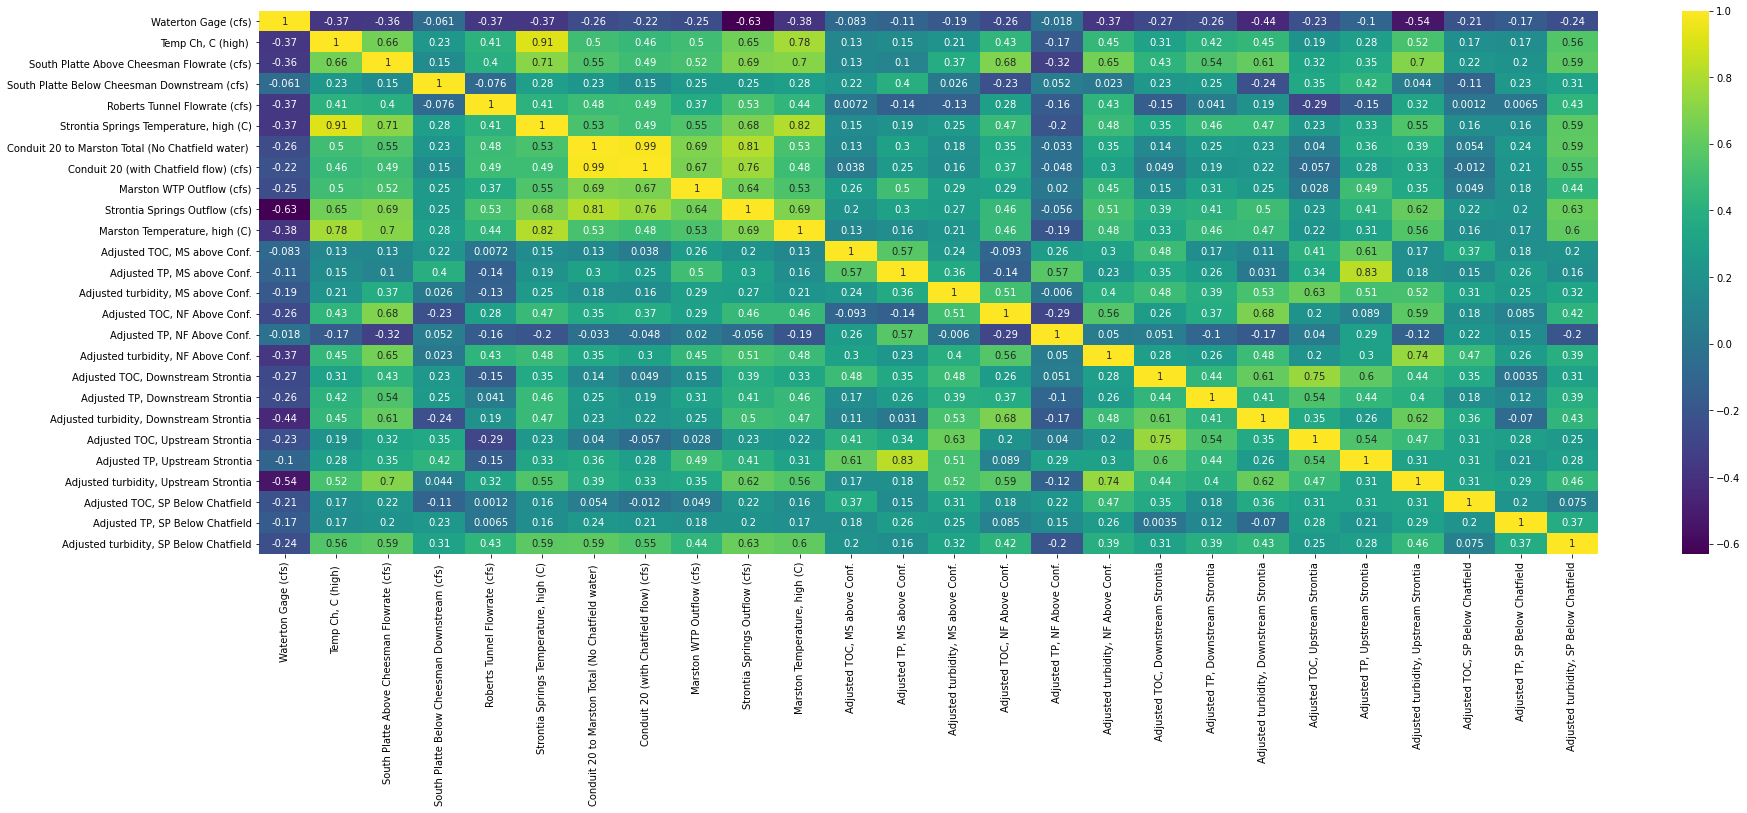

In [24]:
corrl = df_full_val_w_nut.corr()

import matplotlib.pyplot as plt

plt.figure(figsize = (30,10))
ax = sb.heatmap(corrl,cmap='viridis',annot = True)

In [25]:
x_names_w_nut = df_full_val_w_nut.columns.values.tolist()

In [26]:
#new MLR with nutrient concentrations 

from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

x_vals_w_nut = result_w_nut_conduit20[[
'Waterton Gage (cfs)',
 'Temp Ch, C (high) ',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Strontia Springs Temperature, high (C)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)',
 'Adjusted TOC, MS above Conf.',
 'Adjusted TP, MS above Conf.',
 'Adjusted turbidity, MS above Conf.',
 'Adjusted TOC, NF Above Conf.',
 'Adjusted TP, NF Above Conf.',
 'Adjusted turbidity, NF Above Conf.',
 'Adjusted TOC, Downstream Strontia',
 'Adjusted TP, Downstream Strontia',
 'Adjusted turbidity, Downstream Strontia',
 'Adjusted TOC, Upstream Strontia',
 'Adjusted TP, Upstream Strontia',
 'Adjusted turbidity, Upstream Strontia',
 'Adjusted TOC, SP Below Chatfield',
 'Adjusted TP, SP Below Chatfield',
 'Adjusted turbidity, SP Below Chatfield'
 ]]

x_vals_w_nut = StandardScaler().fit_transform(x_vals_w_nut)
y_vals_w_nut = result_w_nut_conduit20[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut, y_vals_w_nut)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut = sm.add_constant(x_vals_w_nut) # adding a constant
 
model = sm.OLS(y_vals_w_nut, x_w_nut).fit()
predictions = model.predict(x_w_nut) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [3.71125]
Coefficients: 
 [[ 0.37103217 -0.12603138  2.6787933   0.61940054  0.80481267 -0.25588068
  -1.06242913  1.28373841  1.20821541 -0.92040063 -0.06490469  0.45912232
   1.69806066 -0.71689316  1.78114841  0.45232484 -3.36205286 -1.65603416
  -1.16292282 -0.0978549   1.47891043 -2.19731466  1.01035158  2.25874508
  -0.84537384 -0.71606179]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     3.773
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           2.08e-05
Time:                        10:22:51   Log-Likelihood:                -138.37
No. Observations:                  80   AIC:                             330.7
Df Residuals:                      53   BIC:                             395.0
Df Mo

### Step 8: Regional model influence - use the larger model with nutrient information

#### Region 1: Cheesman Reservoir area

In [29]:
x_vals_w_nut_ch = result_w_nut_conduit20[[
'South Platte Above Cheesman Flowrate (cfs)',
'South Platte Below Cheesman Downstream (cfs) ',  
'Adjusted TOC, MS above Conf.',
'Adjusted TP, MS above Conf.',
'Adjusted turbidity, MS above Conf.',
]]

x_vals_w_nut_ch = StandardScaler().fit_transform(x_vals_w_nut_ch)
y_vals_w_nut_ch = result_w_nut_conduit20[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut_ch, y_vals_w_nut_ch)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut_ch = sm.add_constant(x_vals_w_nut_ch) # adding a constant
 
model = sm.OLS(y_vals_w_nut_ch, x_w_nut_ch).fit()
predictions = model.predict(x_w_nut_ch) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [3.71125]
Coefficients: 
 [[ 0.53475502 -0.05863121 -0.17681685 -0.06354035 -0.53758858]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.821
Date:                Thu, 22 Dec 2022   Prob (F-statistic):              0.119
Time:                        13:16:55   Log-Likelihood:                -175.63
No. Observations:                  80   AIC:                             363.3
Df Residuals:                      74   BIC:                             377.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

#### Region 2: Roberts Tunnel area

In [30]:
x_vals_w_nut_rt = result_w_nut_conduit20[[
'Roberts Tunnel Flowrate (cfs)',
'Adjusted TOC, NF Above Conf.',
'Adjusted TP, NF Above Conf.',
'Adjusted turbidity, NF Above Conf.',
]]

x_vals_w_nut_rt = StandardScaler().fit_transform(x_vals_w_nut_rt)
y_vals_w_nut_rt = result_w_nut_conduit20[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut_rt, y_vals_w_nut_rt)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut_rt = sm.add_constant(x_vals_w_nut_rt) # adding a constant
 
model = sm.OLS(y_vals_w_nut_rt, x_w_nut_rt).fit()
predictions = model.predict(x_w_nut_rt) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [3.71125]
Coefficients: 
 [[ 0.16215354 -0.32134537 -0.52699736  0.2636044 ]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.096
Date:                Thu, 22 Dec 2022   Prob (F-statistic):              0.365
Time:                        13:18:14   Log-Likelihood:                -178.00
No. Observations:                  80   AIC:                             366.0
Df Residuals:                      75   BIC:                             377.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

#### Region 3: Strontia Springs area

In [31]:
x_vals_w_nut_ss = result_w_nut_conduit20[[
'Strontia Springs Temperature, high (C)',
'Strontia Springs Outflow (cfs)',
'Conduit 20 to Marston Total (No Chatfield water) ',
'Conduit 20 (with Chatfield flow) (cfs)',
'Adjusted TOC, Downstream Strontia',
'Adjusted TP, Downstream Strontia',
'Adjusted turbidity, Downstream Strontia',
'Adjusted TOC, Upstream Strontia',
'Adjusted TP, Upstream Strontia',
'Adjusted turbidity, Upstream Strontia',
]]

x_vals_w_nut_ss = StandardScaler().fit_transform(x_vals_w_nut_ss)
y_vals_w_nut_ss = result_w_nut_conduit20[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut_ss, y_vals_w_nut_ss)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut_ss = sm.add_constant(x_vals_w_nut_ss) # adding a constant
 
model = sm.OLS(y_vals_w_nut_ss, x_w_nut_ss).fit()
predictions = model.predict(x_w_nut_ss) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [3.71125]
Coefficients: 
 [[ 0.17050464 -0.34058003  4.47615126 -4.03390895 -0.55742687 -0.61668166
   0.5845589   0.30169597 -0.87645766 -0.15691609]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.254
Date:                Thu, 22 Dec 2022   Prob (F-statistic):              0.274
Time:                        13:19:06   Log-Likelihood:                -173.59
No. Observations:                  80   AIC:                             369.2
Df Residuals:                      69   BIC:                             395.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t  